In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [4]:
data=pd.read_csv(r'C:\Users\Alex Nest\Documents\WAF Application\ibm_data_v2.csv',encoding = "ISO-8859-1") #import data
data=data.drop(['EmployeeCount', 'EmployeeNumber'], axis=1)

In [5]:
data.dtypes #check data types of the variables
#data.apply(lambda x: sum(x.isnull()),axis=0) #check how many missing values there are in each variable
#data.head(1) #peak at first few rows

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
EducationField              object
Gender                      object
HourlyRate                   int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Education                   object
EnvironmentSatisfaction     object
JobInvolvement      

In [6]:
master = pd.get_dummies(data, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']) #example from online
master.dtypes

Age                                   int64
Attrition                             int64
DailyRate                             int64
DistanceFromHome                      int64
HourlyRate                            int64
JobLevel                              int64
MonthlyIncome                         int64
MonthlyRate                           int64
NumCompaniesWorked                    int64
PercentSalaryHike                     int64
StandardHours                         int64
StockOptionLevel                      int64
TotalWorkingYears                     int64
TrainingTimesLastYear                 int64
YearsAtCompany                        int64
YearsInCurrentRole                    int64
YearsSinceLastPromotion               int64
YearsWithCurrManager                  int64
BusinessTravel_Non-Travel             uint8
BusinessTravel_Travel_Frequently      uint8
BusinessTravel_Travel_Rarely          uint8
Department_Human Resources            uint8
Department_Research & Developmen

In [7]:
#FURTHER REDUCE the number of NO Attribtion's
new_master = master.drop(master[master['Attrition'] < 1].sample(frac=.80).index)
print(new_master)

      Age  Attrition  DailyRate  DistanceFromHome  HourlyRate  JobLevel  MonthlyIncome  \
0      41          1       1102                 1          94         2           5993   
2      37          1       1373                 2          92         1           2090   
10     35          0        809                16          84         1           2426   
14     28          1        103                24          50         1           2028   
21     36          1       1218                 9          82         1           3407   
...   ...        ...        ...               ...         ...       ...            ...   
1451   38          0        345                10         100         2           5343   
1452   50          1        878                 1          94         2           6728   
1460   29          0        468                28          73         1           3785   
1461   50          1        410                28          39         3          10854   
1463   31 

In [8]:
#convert stuff to ARRAYS and LISTS
feature=np.array(new_master.drop(['Attrition'],axis=1))
label=np.array(new_master['Attrition'])

feature_names = list(master.drop(['Attrition'], axis = 1)) # saving the feature names for future use
label_name = list(master['Attrition']) # saving the feature names for future use

In [9]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.15) # 80% training and 30% test

In [20]:
#TRAINING THE RANDOM FOREST

#import packages
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Testing and Validating
y_pred=clf.predict(X_test)

In [21]:
#SEE THE PREDICTION ACCURACY

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6438356164383562


In [22]:
#CALCULATE FEATURE IMPORTANCE
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

MonthlyIncome                         0.060001
TotalWorkingYears                     0.051396
YearsAtCompany                        0.049025
Age                                   0.048784
OverTime_No                           0.046794
OverTime_Yes                          0.043526
DailyRate                             0.042076
YearsWithCurrManager                  0.038388
MonthlyRate                           0.037779
HourlyRate                            0.037761
YearsInCurrentRole                    0.036134
DistanceFromHome                      0.033069
PercentSalaryHike                     0.027290
NumCompaniesWorked                    0.026821
JobLevel                              0.026332
YearsSinceLastPromotion               0.024831
TrainingTimesLastYear                 0.023482
StockOptionLevel                      0.016253
WorkLifeBalance_Better                0.012100
JobSatisfaction_Low                   0.011861
Department_Research & Development     0.010267
EducationFiel

No handles with labels found to put in legend.


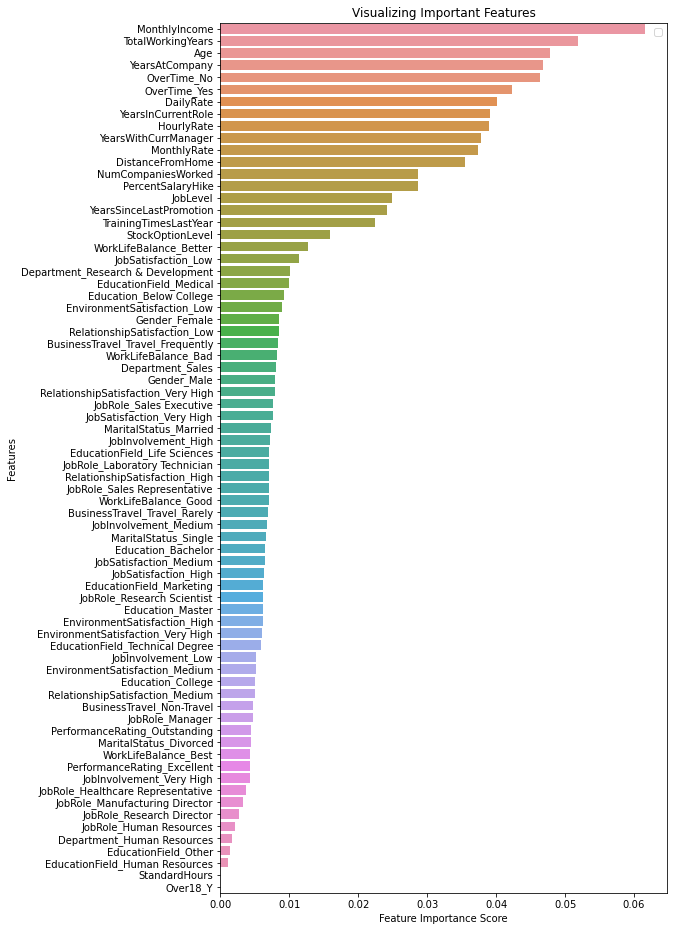

In [18]:
#VIZUALIZE FEATURE IMPORTANCE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(8,16))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [109]:
#GENERATE A MATRIX PLOT

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  9]
 [ 9 37]]


Confusion matrix, without normalization
[[42  9]
 [ 9 37]]


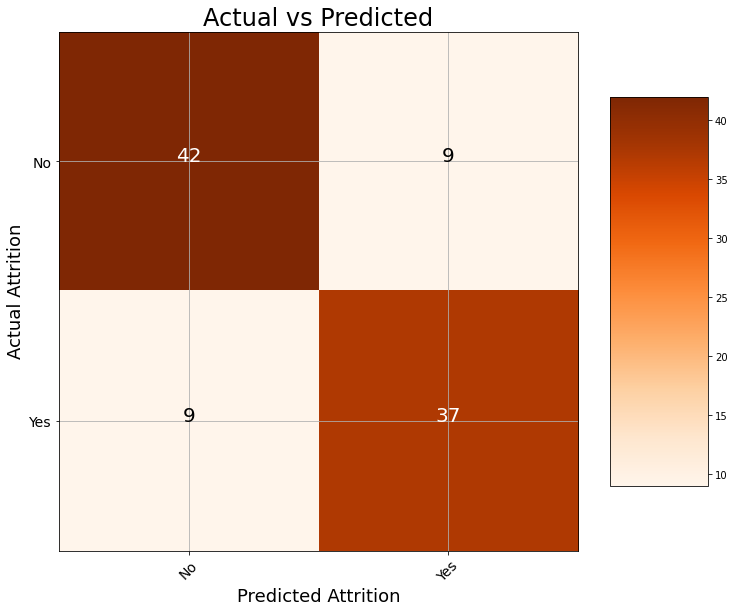

In [110]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Actual Attrition', size = 18)
    plt.xlabel('Predicted Attrition', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['No', 'Yes'],
                      title = 'Actual vs Predicted')

plt.savefig('cm.png')

In [15]:
feature_imp.to_csv('C:\Users\Alex Nest\Documents\WAF Application\feature_imp.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-15-0ff7c1d04cee>, line 1)